<a href="https://colab.research.google.com/github/MdFahim-gif/Custom_CNN_Model_Disease_Classification_-Fahim-/blob/main/Thesis_Version_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import os
import seaborn as sns
import time
import pickle
sns.set()
# This sets a common size for all the figures we will draw.
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
from PIL import Image
import pandas as pd

In [3]:
# Define paths to your image folders
train_folder = "/content/drive/MyDrive/Dataset_V_5/train"
valid_folder = "/content/drive/MyDrive/Dataset_V_5/val"
test_folder = "/content/drive/MyDrive/Dataset_V_5/test"

In [4]:
# Function to load RGB images from a folder with labels inferred from subdirectories
def load_images(folder):
    images = []
    targets = []
    class_folders = os.listdir(folder)
    for class_folder in class_folders:
        class_path = os.path.join(folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # Skip non-directory entries
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if not os.path.isfile(img_path):
                continue  # Skip non-file entries
            img = Image.open(img_path).convert('RGB')  # Keep RGB format
            img = img.resize((256, 256))
            img_array = np.array(img)
            images.append(img_array)

            # Extract target label from parent folder name (class name)
            target = class_folder
            targets.append(target)
    return np.array(images), np.array(targets)

In [5]:
# Load training, validation, and test data
input_train, target_train = load_images(train_folder)
input_valid, target_valid = load_images(valid_folder)
input_test, target_test = load_images(test_folder)

In [6]:
# Reshape data
input_train = input_train.reshape(input_train.shape[0], 256, 256, 3)  # Use 3 channels
input_valid = input_valid.reshape(input_valid.shape[0], 256, 256, 3)  # Use 3 channels
input_test = input_test.reshape(input_test.shape[0], 256, 256, 3)  # Use 3 channels
input_shape = (256, 256, 3)  # Adjust input shape for RGB images

In [7]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_valid = input_valid.astype('float32')
input_test = input_test.astype('float32')

In [8]:
# Convert into [0, 1] range
input_train = input_train / 255
input_valid = input_valid / 255
input_test = input_test / 255

In [9]:
# Create a dictionary to map string labels to numeric values
label_to_index = {label: index for index, label in enumerate(np.unique(target_train))}
# Print the label-to-index mapping
print("Label to Index Mapping:")
for label, index in label_to_index.items():
    print(f"Label: {label} -> Index: {index}")


Label to Index Mapping:
Label: Apple___Apple_scab -> Index: 0
Label: Apple___Black_rot -> Index: 1
Label: Apple___Cedar_apple_rust -> Index: 2
Label: Apple___healthy -> Index: 3


In [10]:
# Convert string labels to numeric values using label_to_index mapping
target_train_indices = np.array([label_to_index[label] for label in target_train])
target_test_indices = np.array([label_to_index[label] for label in target_test])
target_valid_indices = np.array([label_to_index[label] for label in target_valid])

In [11]:
from tensorflow.keras.utils import to_categorical

# Convert numeric labels to categorical targets
target_train_categorical = to_categorical(target_train_indices, num_classes=4)
target_valid_categorical = to_categorical(target_valid_indices, num_classes=4)
target_test_categorical = to_categorical(target_test_indices, num_classes=4)
# Print the shape of data and targets after preprocessing
print("Input shape (train):", input_train.shape)
print("Input shape (validation):", input_valid.shape)
print("Input shape (test):", input_test.shape)
print("Target shape (train):", target_train_categorical.shape)
print("Target shape (validation):", target_valid_categorical.shape)
print("Target shape (test):", target_test_categorical.shape)


Input shape (train): (560, 256, 256, 3)
Input shape (validation): (160, 256, 256, 3)
Input shape (test): (80, 256, 256, 3)
Target shape (train): (560, 4)
Target shape (validation): (160, 4)
Target shape (test): (80, 4)


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(input_train, target_train_categorical,
                    epochs=100, batch_size=32,
                    validation_data=(input_valid, target_valid_categorical))

Epoch 1/100
18/18 [==============================] - 12s 187ms/step - loss: 1.3418 - accuracy: 0.4250 - val_loss: 0.7838 - val_accuracy: 0.6938
Epoch 2/100
18/18 [==============================] - 1s 71ms/step - loss: 0.5781 - accuracy: 0.7821 - val_loss: 0.4627 - val_accuracy: 0.8500
Epoch 3/100
18/18 [==============================] - 2s 86ms/step - loss: 0.3361 - accuracy: 0.8929 - val_loss: 0.4177 - val_accuracy: 0.8750
Epoch 4/100
18/18 [==============================] - 1s 81ms/step - loss: 0.3154 - accuracy: 0.8875 - val_loss: 0.2689 - val_accuracy: 0.9187
Epoch 5/100
18/18 [==============================] - 1s 76ms/step - loss: 0.2583 - accuracy: 0.9161 - val_loss: 0.3993 - val_accuracy: 0.9000
Epoch 6/100
18/18 [==============================] - 1s 73ms/step - loss: 0.1959 - accuracy: 0.9446 - val_loss: 0.2565 - val_accuracy: 0.8938
Epoch 7/100
18/18 [==============================] - 1s 73ms/step - loss: 0.1712 - accuracy: 0.9429 - val_loss: 0.5117 - val_accuracy: 0.8562
Epoc

In [15]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(input_test, target_test_categorical)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


3/3 [==============================] - 1s 26ms/step - loss: 1.0282 - accuracy: 0.9125
Test Loss: 1.0282347202301025
Test Accuracy: 0.9125000238418579


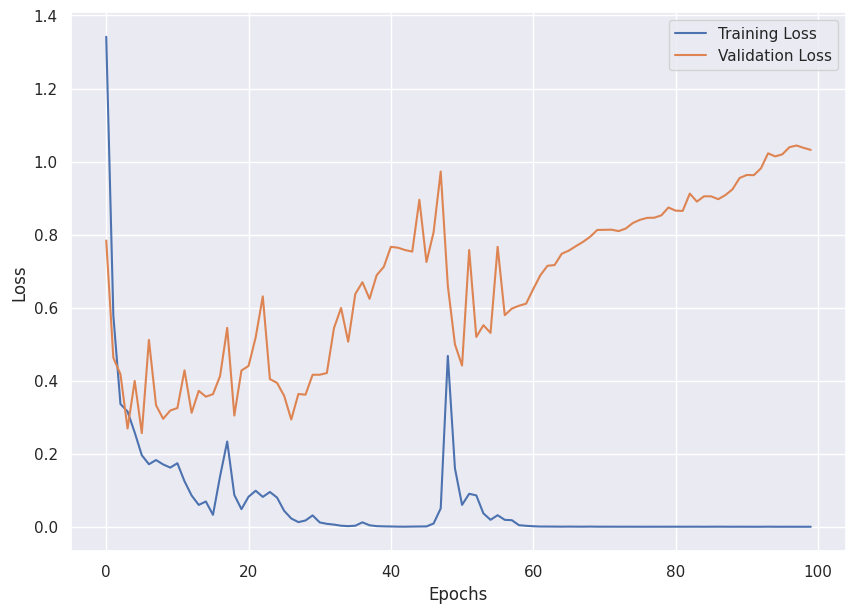

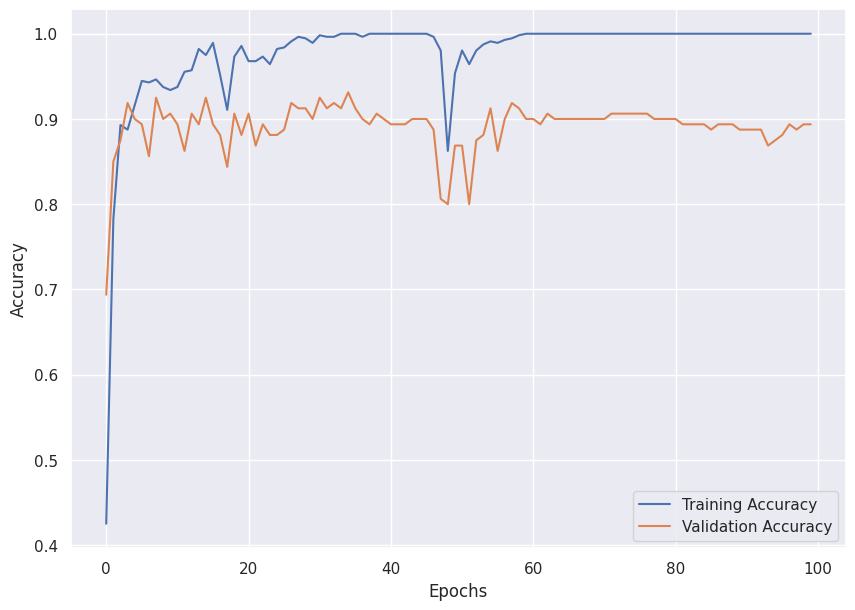

In [16]:
# Optionally, visualize training history
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report

# Make predictions on test data
predictions = model.predict(input_test)

# Convert predictions from one-hot encoded format to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoded format to class labels
true_classes = np.argmax(target_test_categorical, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes)

# Print the classification report
print("Classification Report:")
print(report)


3/3 [==============================] - 1s 46ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.91      1.00      0.95        20
           2       1.00      0.95      0.97        20
           3       0.85      0.85      0.85        20

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



1/1 [==============================] - 0s 30ms/step


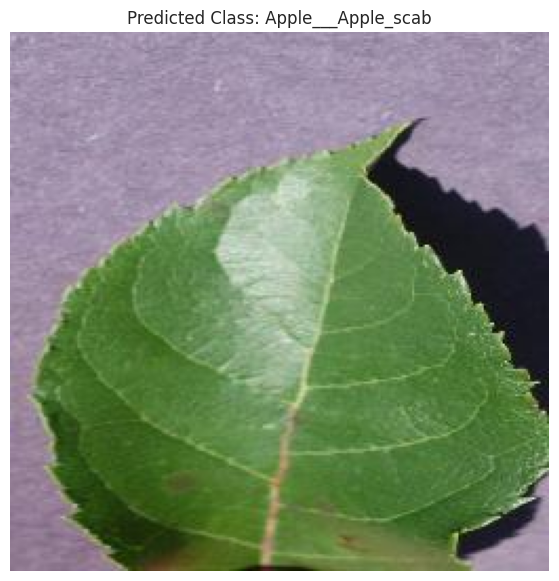

In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

# Load the new image
new_image_path = "/content/drive/MyDrive/Dataset_V_5/test/Apple___Apple_scab/96a26f9f-76b9-456a-b39f-d390ff20bc58___FREC_Scab 3257.JPG"
new_image = keras_image.load_img(new_image_path, target_size=(256, 256))  # Resize to match model's input shape

# Replace the existing label_to_index dictionary with the following:
label_to_index = {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3}

# Preprocess the image
new_image_array = keras_image.img_to_array(new_image)
new_image_array = new_image_array / 255.0  # Normalize pixel values to [0, 1]
new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

# Use the model to predict class probabilities for the new image
predictions = model.predict(new_image_array)

# Determine the predicted class label based on the highest probability
predicted_class_index = np.argmax(predictions)
predicted_class_label = list(label_to_index.keys())[predicted_class_index]  # Get the class label corresponding to the index

# Plot the image with its corresponding class name
plt.imshow(new_image)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()



1/1 [==============================] - 0s 31ms/step


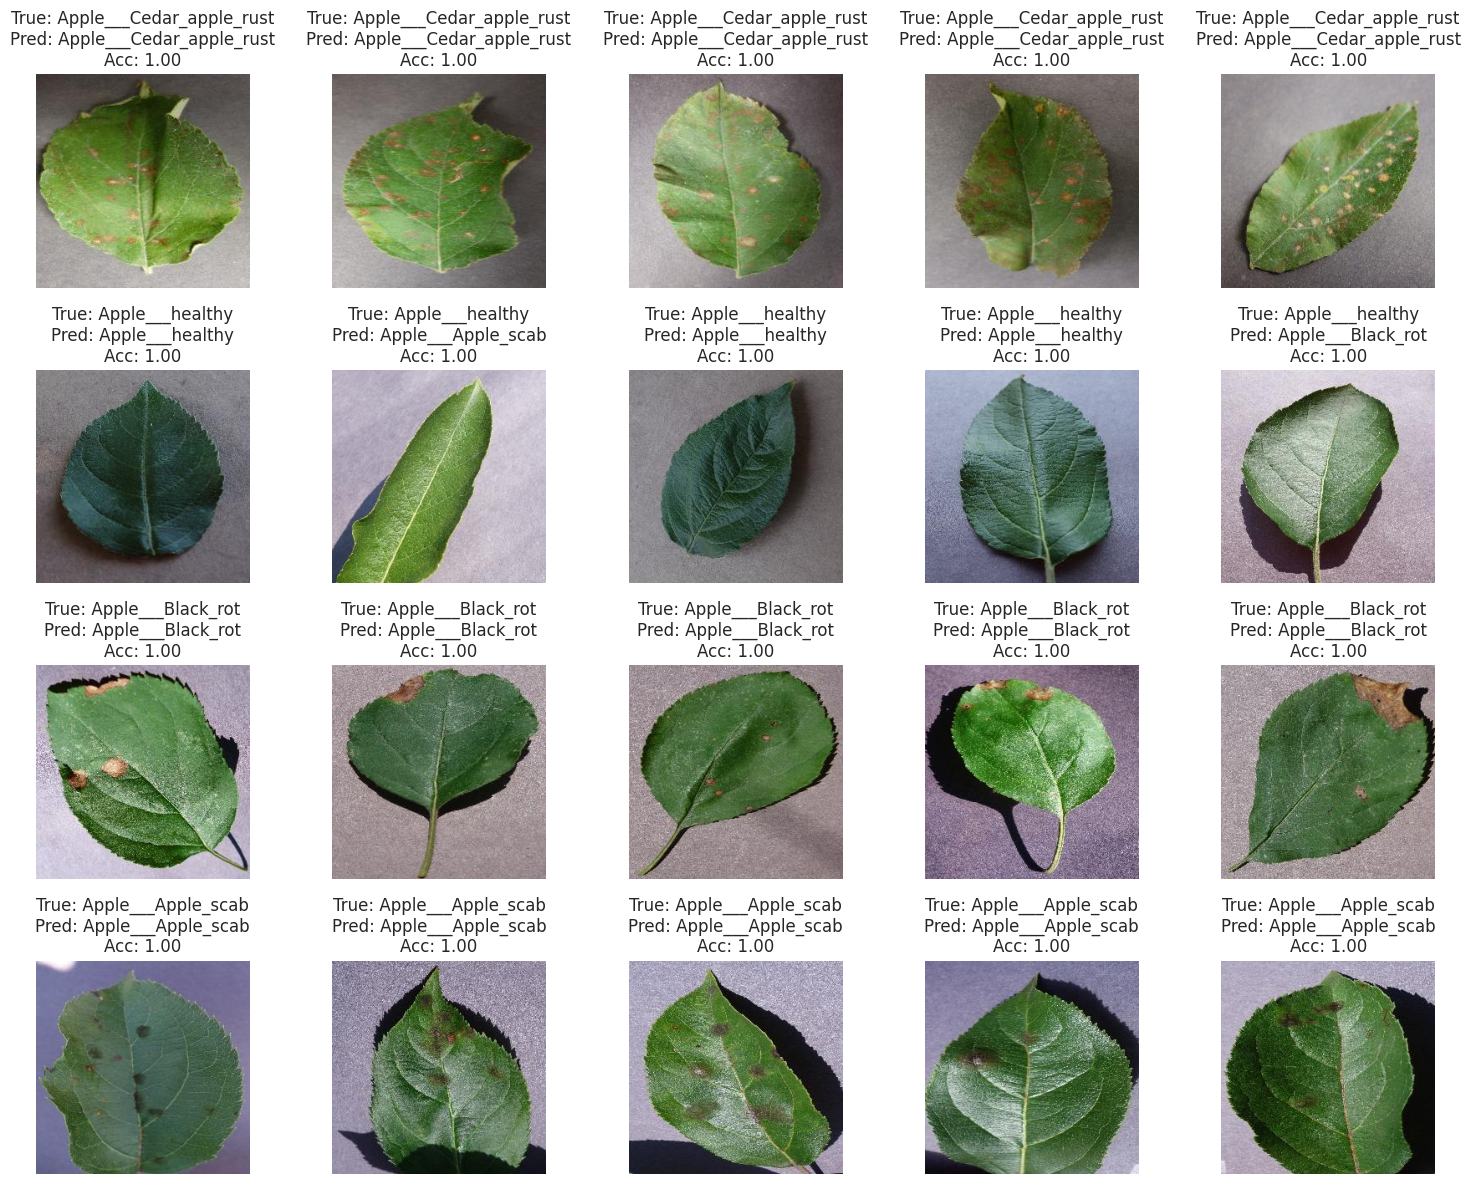

In [31]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

# Define the path to the test directory
test_dir = "/content/drive/MyDrive/Dataset_V_5/test"

# Define the classes
classes = os.listdir(test_dir)

# Create a dictionary to store the paths of images for each class
class_image_paths = {cls: [] for cls in classes}

# Populate the dictionary with image paths
for cls in classes:
    class_dir = os.path.join(test_dir, cls)
    class_images = os.listdir(class_dir)
    class_image_paths[cls] = [os.path.join(class_dir, img) for img in class_images]

# Take random 5 images from each class
random_images = []
for cls in classes:
    random_images.extend(random.sample(class_image_paths[cls], 5))

# Create subplots in a grid of 5 columns and 4 rows
fig, axs = plt.subplots(4, 5, figsize=(15, 12))

# Iterate over the subplots
for i, ax in enumerate(axs.flat):
    # Load the image
    image_path = random_images[i]
    image = keras_image.load_img(image_path, target_size=(256, 256))
    # Preprocess the image
    image_array = keras_image.img_to_array(image)
    image_array = image_array / 255.0
    image_array = image_array.reshape((1, 256, 256, 3))  # Add batch dimension

    # Get the true class name
    true_class = os.path.basename(os.path.dirname(image_path))

    # Use the model to predict class probabilities for the image
    predictions = model.predict(image_array)
    # Determine the predicted class label based on the highest probability
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = list(label_to_index.keys())[predicted_class_index]  # Get the class name corresponding to the index
    # Get the predicted class probability
    predicted_probability = predictions[0][predicted_class_index]

    # Plot the image with its corresponding class name and prediction accuracy
    ax.imshow(image)
    ax.set_title(f"True: {true_class}\nPred: {predicted_class_name}\nAcc: {predicted_probability:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()




3/3 [==============================] - 0s 26ms/step


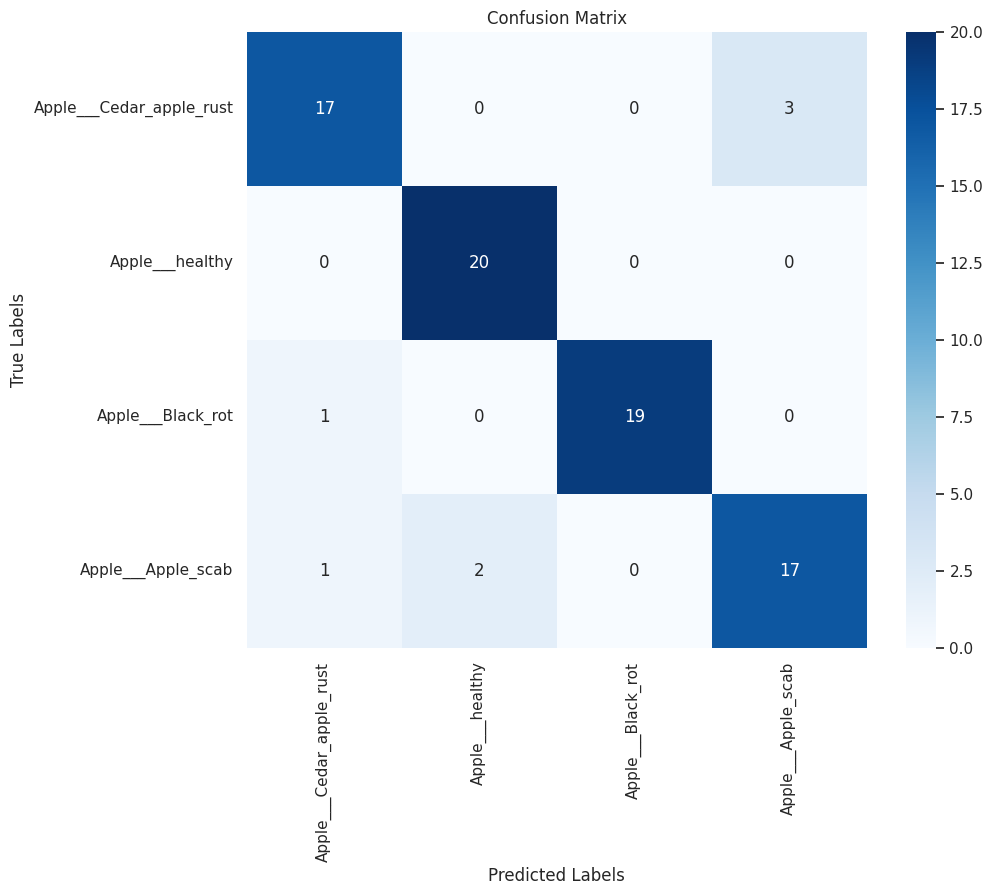

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true class labels for the test set
true_labels = [label_to_index[label] for label in target_test]

# Get the predicted class labels for the test set
predicted_labels = [np.argmax(prediction) for prediction in model.predict(input_test)]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
